# Case Study
$$
\def\n{\mathbf{n}}
\def\x{\mathbf{x}}
\def\N{\mathbb{\mathbb{N}}}
\def\X{\mathbb{X}}
\def\NX{\mathbb{\N_0^\X}}
\def\C{\mathcal{C}}
\def\Jc{\mathcal{J}_c}
\def\DM{\Delta M_{c,j}}
\newcommand\diff{\mathop{}\!\mathrm{d}}
\def\Xc{\mathbf{X}_c}
\def\Yc{\mathbf{Y}_c}
\newcommand{\muset}[1]{\dot{\{}#1\dot{\}}}
$$

In [1]:
# initialize sympy printing (for latex output)
from sympy import init_printing, Symbol
init_printing()

# import functions and classes for compartment models
from compartor import *

## Specifying the reaction network

In [2]:
x = Content('x')
y = Content('y')

# Intake Distribution
pi_I = OutcomeDistribution.poisson(Symbol('\pi_{I}(y; \lambda)'),y[0],Symbol('\lambda'))

Intake      = TransitionClass( {}        -to> [(y[0],0)],   'k_I', pi=pi_I, name='I')
Fusion      = TransitionClass( [x] + [y] -to> [x + y],      'k_F',          name='F')
Conversion  = TransitionClass( [x]       -to> [x + (-1,1)], 'k_c', x[0],    name='c')
Degradation = TransitionClass( [x]       -to> [x + (0,-1)], 'k_d', x[1],    name='d')

transitions = [ Intake, Fusion, Conversion, Degradation]

display_transition_classes(transitions)

Display.__str__: TODO

## Deriving expected moment dynamics

Next we specify the moments we want to derive by means of the `Moment` class. It takes as constructor arguments the integer exponents in each species.

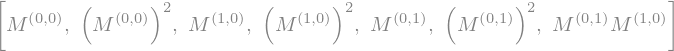

In [3]:
moments = [
    Moment(0,0),
    Moment(0,0)**2,
    Moment(1,0),
    Moment(1,0)**2,
    Moment(0,1),
    Moment(0,1)**2,
    Moment(1,0)*Moment(0,1)
]
display(moments)

Then call the function `compute_moment_equations()` to generate the moment ODES for the given model and the desired set of moments.

In [4]:
equations = compute_moment_equations(transitions, moments)

`equations` are the expressions for the expectation of the desired moment expressions.
`equations` is a list of pairs `(fM, dfMdt)`, where each pair consists of the desired moment expression, and the derived expression for its derivative by $t$.

To display the derived equations, use the `display_moment_equations()` function.

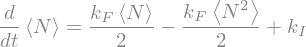

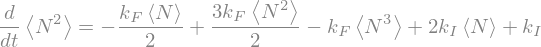

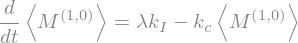

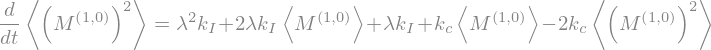

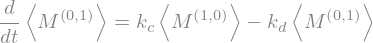

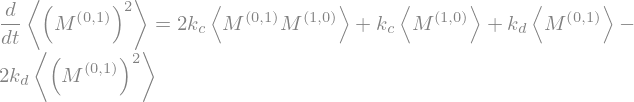

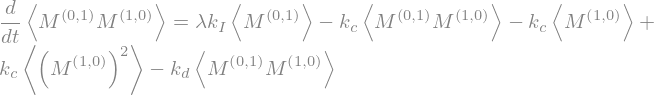

**The system is not closed!** Moment equations are missing for:

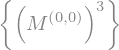

In [5]:
display_moment_equations(equations)

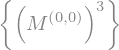

In [6]:
missing = get_missing_moments(equations)
missing

`missing` is a set of moment expressions that are required in the ODE system, but are not characterized yet (not listed in desired `moments`).

## Gamma closure
Next we compute the Gamma closures for the missing moments.

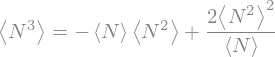

In [7]:
closures = gamma_closures(missing)
display_closures(closures)

We substitute the closures into the moment equations.

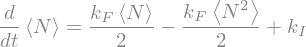

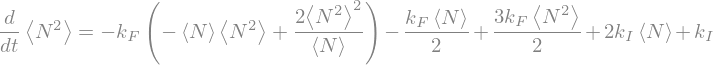

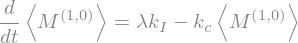

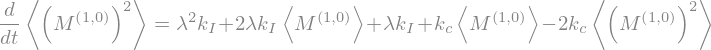

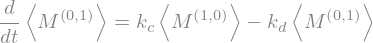

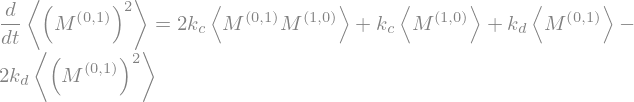

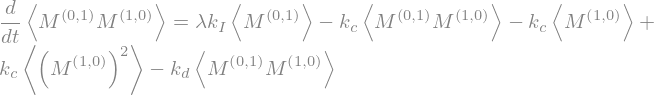

In [8]:
equations = substitute_closures(equations, closures)
display_moment_equations(equations)

## Code generation
From the closed equations, we can generate code for simulating the system.
Currently, Python or Julia code can be generated.
Both derive from a common `AbstractCodeGenerator` class, and it should be relatively straightforward to tweak the code generation for other languages/solvers.

For a direct code output, the user can also rely on the functions

In [9]:
python_code = generate_python_code(equations, function_name="example")

or, for Julia code,

In [10]:
julia_code = generate_julia_code(equations, function_name="example")

## Automated derivation of moment equations
Compartor is equipped with the function `automated_moment_equations` to automatically handle the process of moment identification, equation generation and moment closure for a provided model. 

In its basic usage, `automated_moment_equations` takes two arguments: the number of chemical species of the system and the set of transition classes. In this case, the output corresponds to the smallest closed system of moment equations compatible with the provided transition classes.

In [11]:
equations = automated_moment_equations(2, transitions)

Computed moment equations for desired moments $N$, $M^{\left(1, 0\right)}$, and $M^{\left(0, 1\right)}$.

Equations were iteratively added for $N^{2}$.

Gamma closures were substituted for $N^{3}$.

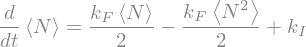

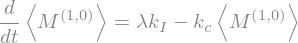

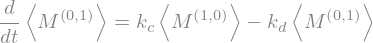

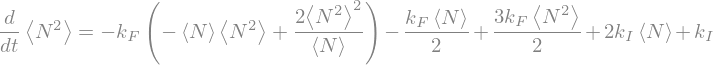

In [12]:
display_moment_equations(equations)

Optionally, a list of moments can be passed to `automated_moment_equations` to require them to be included in the system of moment equations.

In [13]:
desired_moments = [Moment(0,0), Moment(0,1)**2]
equations = automated_moment_equations(2, transitions, desired_moments)

Computed moment equations for desired moments $N$ and ${\left(M^{\left(0, 1\right)}\right)}^{2}$.

Equations were iteratively added for $M^{\left(1, 0\right)}$, $N^{2}$, $M^{\left(0, 1\right)}$, $M^{\left(0, 1\right)} M^{\left(1, 0\right)}$, and ${\left(M^{\left(1, 0\right)}\right)}^{2}$.

Gamma closures were substituted for $N^{3}$.

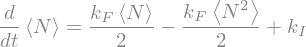

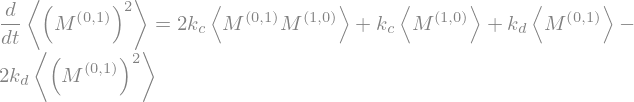

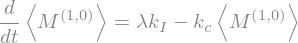

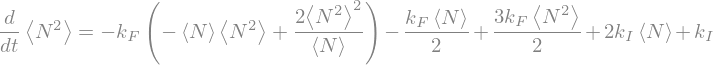

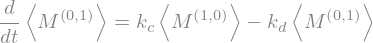

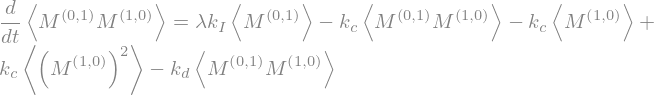

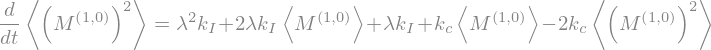

In [14]:
display_moment_equations(equations)